# Question 1 & 2: Which AI search and development tools are used and which  are planned to be used


In [1]:
# List all imported modules and functions / classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from my_functions import filter_columns_from_data_source



## Gather data

Read data set from source: https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2024.zip

In [2]:
df_data=pd.read_csv("survey_results_public.csv")
# show an overview of all data
df_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Preselect columns of interest from large survey
Preselect the columns related to the use of AI tools and developers characteristics.
Get and overview on all columns and check whether all are taken into account correctly. Presec

In [3]:

selected_columns=[ 
    "MainBranch", # classification of developer (profession-hobby)
    "Age", # categorized under 18,  18-24, 25-34 35-44 45-54 55-64 65 and above no comment
    "Employment", # categorized 
    "EdLevel", # categorized primary, secondary, college / university without degree, Associated ,Bachelor , Master , professional degree , else  / 
    "LearnCode", 
    "YearsCode",
    "YearsCodePro",
    "DevType",
    "OrgSize",
    "AISearchDevHaveWorkedWith", # list of tool selection
    "AISearchDevWantToWorkWith", # list of tool selection
    "AISearchDevAdmired", # list of tool selection
    "AISelect", # categrical use AI in current workflow Yes, NO, but I plan to soon No, and I don not plan to  
    "AISent", # categorical from favourablevery  to indifferent to very unfavourable and unsure
    "AIAcc",  # Likert like Highly , somewhat neiter trust nor distrust somewhat distrust, highly distrust
    "AIComplex",
    "AIThreat", # thread to job, yes, no I am not sure
    "AIEthics",
    "AIChallenges", 
    "ConvertedCompYearly", # numerical 
    "JobSat"  # numerical categorized 
]

my_excluded=[
    "JobSatPoints_1",
    "JobSatPoints_4",
    "JobSatPoints_5",
    "JobSatPoints_6",
    "JobSatPoints_7",
    "JobSatPoints_8",
    "JobSatPoints_9",
    "JobSatPoints_10",
    "JobSatPoints_11",
    "TBranch",
    "ICorPM",
    "WorkExp",
    "AIBen", 
    "Knowledge_1",
    "Knowledge_2",
    "Knowledge_3",
    "Knowledge_4",
    "Knowledge_5",
    "Knowledge_6",
    "Knowledge_7",
    "Knowledge_8",
    "Knowledge_9",
    "Frequency_1",
    "Frequency_2",
    "Frequency_3",
    "TimeSearching",
    "TimeAnswering",
    "Frustration",
    "ProfessionalTech",
    "ProfessionalCloud",
    "ProfessionalQuestion",
    "Industry",
    "ResponseId",
    "LearnCodeOnline",
    "TechDoc",
    "PurchaseInfluence",
    "BuyNewTool",
    "BuildvsBuy",
    "TechEndorse",
    "Country",
    "Currency",
    "CompTotal",    
    "Check",
    "RemoteWork",
    "AIToolCurrently Using",
    "AIToolInterested in Using",
    "AIToolNot interested in Using",
    "AINextMuch more integrated",
    "AINextNo change",
    "AINextMore integrated",
    "AINextLess integrated",
    "AINextMuch less integrated",
    "CodingActivities",
    "LanguageHaveWorkedWith",
    "LanguageWantToWorkWith",
    "LanguageAdmired",
    "DatabaseHaveWorkedWith",
    "DatabaseWantToWorkWith",
    "DatabaseAdmired",
    "PlatformHaveWorkedWith",
    "PlatformWantToWorkWith",
    "PlatformAdmired",
    "WebframeHaveWorkedWith",
    "WebframeWantToWorkWith",
    "WebframeAdmired",
    "EmbeddedHaveWorkedWith",
    "EmbeddedWantToWorkWith",
    "EmbeddedAdmired",
    "MiscTechHaveWorkedWith",
    "MiscTechWantToWorkWith",
    "MiscTechAdmired",
    "ToolsTechHaveWorkedWith",
    "ToolsTechWantToWorkWith",
    "ToolsTechAdmired",
    "NEWCollabToolsHaveWorkedWith",
    "NEWCollabToolsWantToWorkWith",
    "NEWCollabToolsAdmired",
    "OpSysPersonal use",
    "OpSysProfessional use",
    "OfficeStackAsyncHaveWorkedWith",
    "OfficeStackAsyncWantToWorkWith",
    "OfficeStackAsyncAdmired",
    "OfficeStackSyncHaveWorkedWith",
    "OfficeStackSyncWantToWorkWith",
    "OfficeStackSyncAdmired",
    "NEWSOSites",
    "SOVisitFreq",
    "SOAccount",
    "SOPartFreq",
    "SOHow",
    "SOComm",
    "SurveyLength",
    "SurveyEase"
]
# check that no typo occured and that both selection lists add up to the initial column list
is_len_equal=len(set(selected_columns+my_excluded)) ==len(df_data.columns)
print(f"Two sets and initial columns have same length: {is_len_equal}")
is_equal=set(selected_columns+my_excluded)==set(df_data.columns)
print(f"Two selection sets are identical: {is_equal}")


Two sets and initial columns have same length: True
Two selection sets are identical: True


### Select columns to address question which AI tools are used and planned to be used
Choose the columns:
* AISerachDeveHaveWorkedWith containing a string list of selections from a tool list provided in the survey (see 2024 Developer Survey.pdf)
* AISeachDevWantToWork withcontaining a string list of selections from a tool list provided in the survey (see 2024 Developer Survey.pdf) 

In [4]:
question1_selected_columns=[ 
    "AISearchDevHaveWorkedWith",
    "AISearchDevWantToWorkWith",
]

df_filtered=filter_columns_from_data_source(question1_selected_columns,"survey_results_public.csv")
df_filtered.info()
df_filtered.describe()
df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   AISearchDevHaveWorkedWith  44453 non-null  object
 1   AISearchDevWantToWorkWith  36701 non-null  object
dtypes: object(2)
memory usage: 1022.6+ KB


,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


## Clean the data
Only rows which contain nan in both columns will be removed. In case only one column in a row is nan, this value will be assigned no tool selected when calculating the number of tools

In [5]:
df_clean=df_filtered.dropna(how="all")
df_clean.info()
df_clean.head()



<class 'pandas.core.frame.DataFrame'>
Index: 44453 entries, 5 to 65421
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   AISearchDevHaveWorkedWith  44453 non-null  object
 1   AISearchDevWantToWorkWith  36701 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith
5,ChatGPT;GitHub Copilot;OpenAI Codex,ChatGPT;GitHub Copilot
7,ChatGPT,ChatGPT
9,ChatGPT;Google Gemini,ChatGPT;Google Gemini
10,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;V...,GitHub Copilot;Google Gemini;Visual Studio Int...
13,ChatGPT,ChatGPT


## Analyse the data
The tool entries consist of a string list of tools, for counting the usage of each individual tool, the string list is split into its single entries and exploded for counting.
To calculate the percentage, the number of participating developers, e.g. the number of rows.

In [6]:
df_current=df_clean[["AISearchDevHaveWorkedWith"]].assign(AISearchDevHaveWorkedWith=df_clean["AISearchDevHaveWorkedWith"].str.split(";")).explode("AISearchDevHaveWorkedWith")
df_planned=df_clean[["AISearchDevWantToWorkWith"]].assign(AISearchDevWantToWorkWith=df_clean["AISearchDevWantToWorkWith"].str.split(";")).explode("AISearchDevWantToWorkWith")
total_developers=df_clean.shape[0]
print(f"Number of developer in survey selection:{total_developers}")
current_counts=df_current["AISearchDevHaveWorkedWith"].value_counts() 
planned_counts=df_planned["AISearchDevWantToWorkWith"].value_counts() 



Number of developer in survey selection:44453


Create a data frame as basis for visualizing the currently used tools 


In [10]:
used_counts=pd.DataFrame({"Currently used" : current_counts}).fillna(0)
used_counts_percentage=used_counts.div(total_developers, axis=0) * 100
used_counts_percentage_sorted=used_counts_percentage.sort_values(by="Currently used", ascending=False)


,Currently used
AISearchDevHaveWorkedWith,
ChatGPT,85.310328
GitHub Copilot,42.813758
Google Gemini,24.871212
Bing AI,16.433087
Visual Studio Intellicode,14.163274
Claude,8.458372
Codeium,6.319034
WolframAlpha,5.774638
Perplexity AI,5.538434


Combine both used and planned to use columns into one data frame and calculate the precentage for visualization and sort them according to the currently used column in ascending order

In [11]:
combined_counts=pd.DataFrame({"Currently used" : current_counts, "Planned use" : planned_counts }).fillna(0)
combined_counts_percentage=combined_counts.div(total_developers, axis=0) * 100
combined_counts_percentage_sorted=combined_counts_percentage.sort_values(by="Currently used", ascending=False)

## Visualize data
First show a diagram that contains only the tools used to answer question 1 and then show a diagram with the tools used and the tools planned to be used next to each other

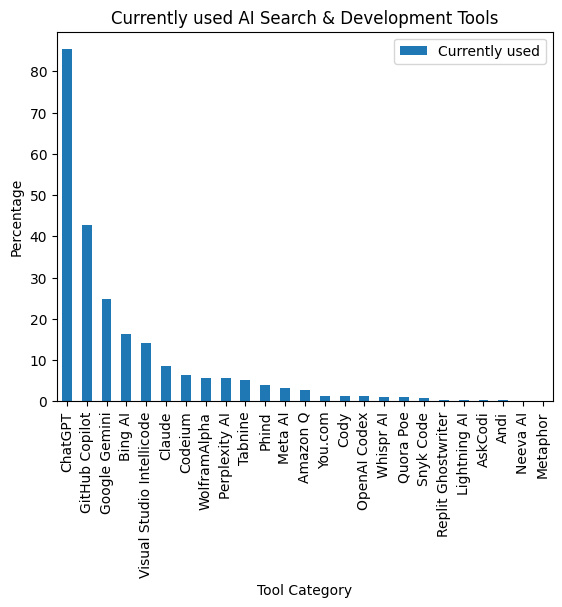

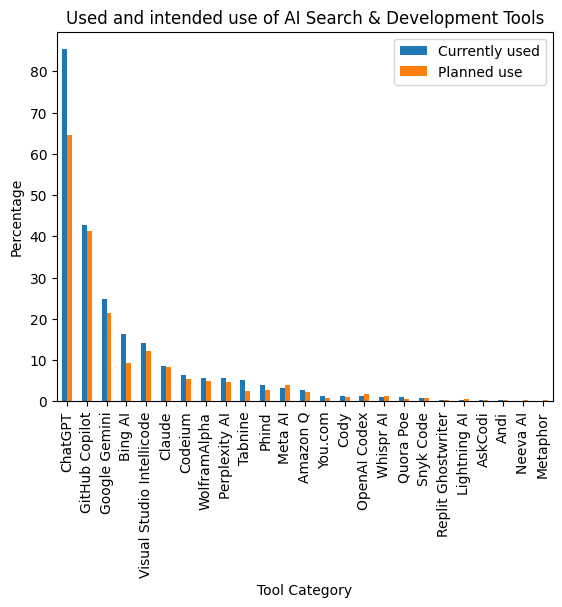

In [12]:

used_counts_percentage_sorted.plot(kind="bar")
plt.xlabel("Tool Category")
plt.ylabel("Percentage")
plt.title("Currently used AI Search & Development Tools")


combined_counts_percentage_sorted.plot(kind="bar")
plt.xlabel("Tool Category")
plt.ylabel("Percentage")
plt.title("Currently used and planned to use AI Search & Development Tools")

# Show the plot
plt.show()
